In [1]:
import torch

/home/sofiaguerreiro/molecules-binding/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
results = torch.load("../../results/e8dc8b6c1c5346ca8e6910f2a1aa3d9c")

In [3]:
results

tensor([[ 5.8702,  8.5200],
        [ 5.1390,  5.1700],
        [ 8.6029,  9.5200],
        [ 8.6123, 11.0900],
        [ 7.6780,  5.6000],
        [ 4.5734,  5.9600],
        [ 7.5194,  4.7600],
        [ 6.4245,  6.6300],
        [ 3.8371,  4.0100],
        [ 5.8473,  6.1200],
        [ 3.6677,  2.8500],
        [ 4.9667,  5.2200],
        [ 3.0761,  3.2800],
        [ 4.0505,  2.8900],
        [ 5.2310,  8.8200],
        [ 5.4721,  7.3000],
        [ 7.6446,  8.6600],
        [ 6.8108,  6.3200],
        [ 6.5937,  5.9600],
        [ 4.2873,  5.2400],
        [ 7.7339,  5.1400],
        [ 6.1565,  5.2700],
        [ 4.6275,  5.9200],
        [ 4.5434,  6.9200],
        [ 7.6381,  7.9600],
        [ 7.0351, 10.1700],
        [ 6.0229,  6.8800],
        [ 5.8527,  4.1100],
        [ 4.3721,  4.4100],
        [ 8.0575,  7.8000],
        [ 1.8821,  2.2700],
        [ 9.2430,  9.5400],
        [ 3.7107,  2.9600],
        [ 5.1899,  5.9100],
        [ 5.7815,  6.0000],
        [ 7.1134,  6

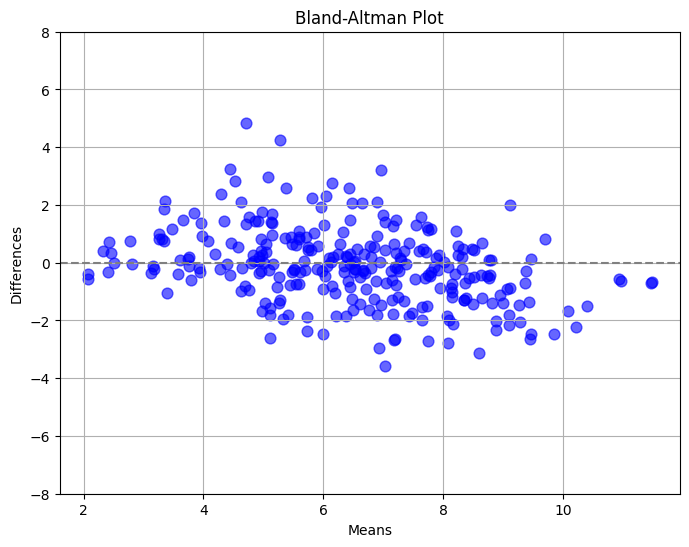

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Example input tensor
input_tensor = results

# Compute differences and means
differences = input_tensor[:, 0] - input_tensor[:, 1]
means = 0.5 * (input_tensor[:, 0] + input_tensor[:, 1])

# Create the Bland-Altman plot
plt.figure(figsize=(8, 6))
plt.scatter(means, differences, c='blue', marker='o', s=60, alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--')
plt.ylim(-8, 8)
plt.title("Bland-Altman Plot")
plt.xlabel("Means")
plt.ylabel("Differences")
plt.grid(True)
plt.show()


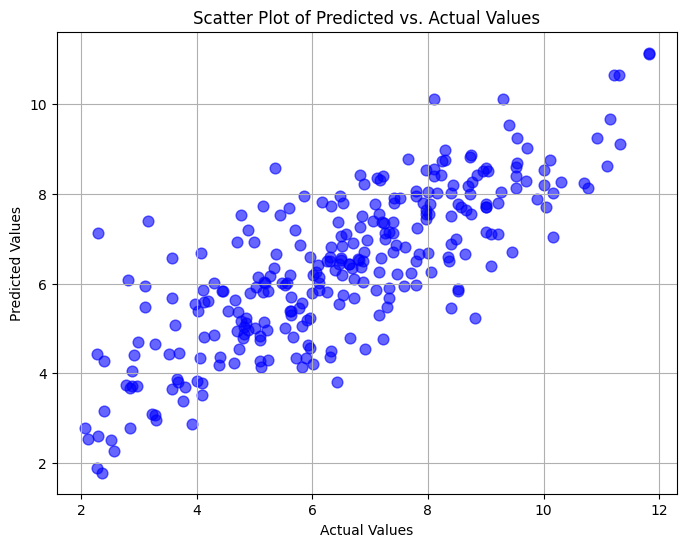

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(input_tensor[:, 1], input_tensor[:, 0], c='blue', marker='o', s=60, alpha=0.6)
plt.title("Scatter Plot of Predicted vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

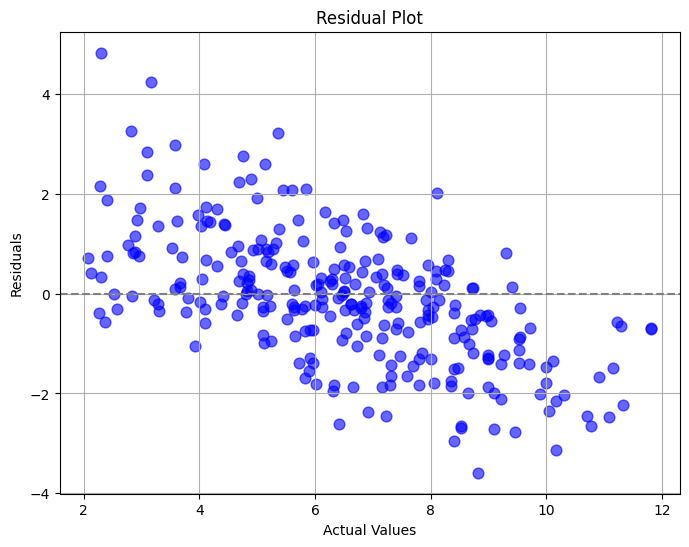

In [6]:
residuals = input_tensor[:, 0] - input_tensor[:, 1]
plt.figure(figsize=(8, 6))
plt.scatter(input_tensor[:, 1], residuals, c='blue', marker='o', s=60, alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

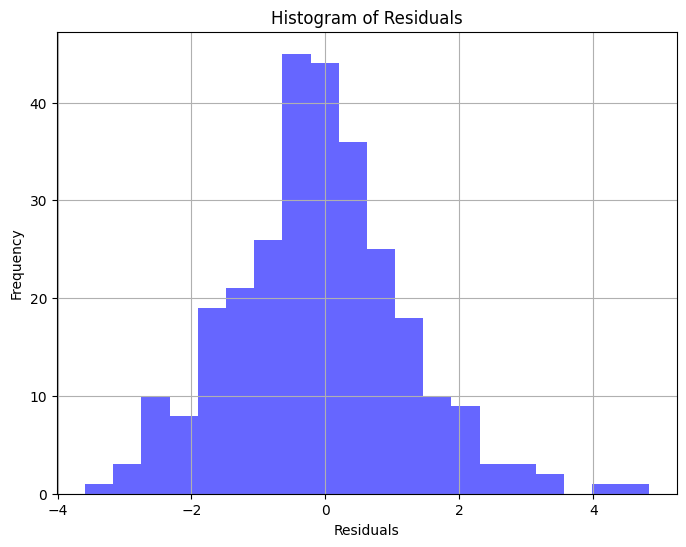

In [7]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color='blue', alpha=0.6)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

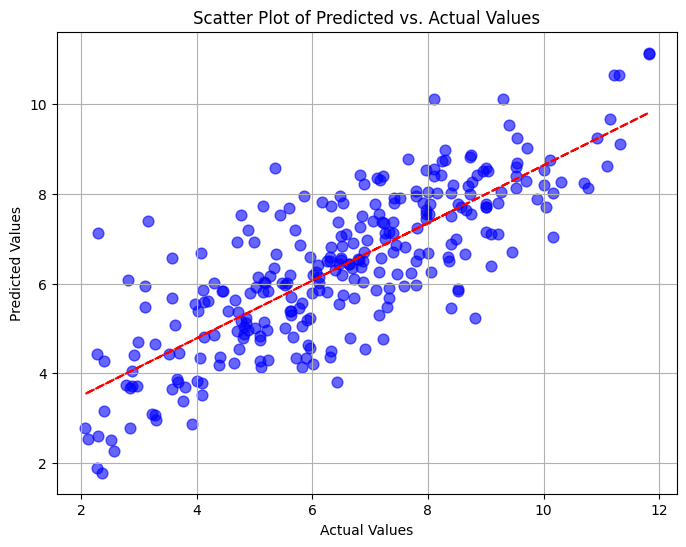

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(input_tensor[:, 1], input_tensor[:, 0], c='blue', marker='o', s=60, alpha=0.6)
plt.title("Scatter Plot of Predicted vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)

# Add a line of best fit
z = np.polyfit(input_tensor[:, 1], input_tensor[:, 0], 1)
p = np.poly1d(z)
plt.plot(input_tensor[:, 1], p(input_tensor[:, 1]), "r--")

plt.show()

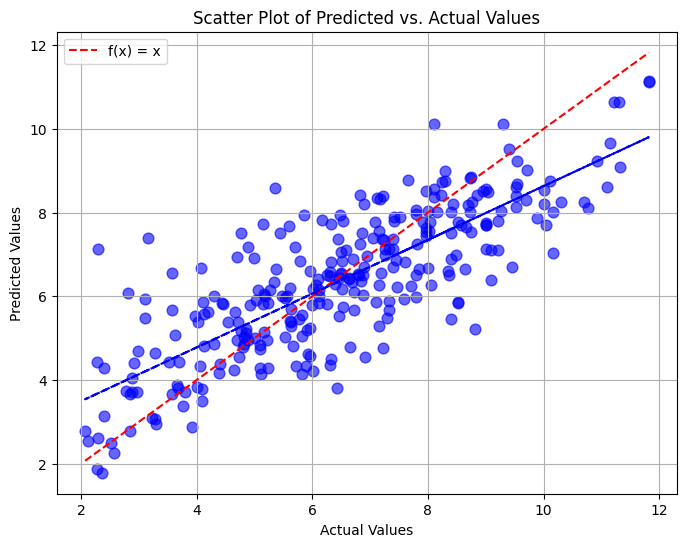

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(input_tensor[:, 1], input_tensor[:, 0], c='blue', marker='o', s=60, alpha=0.6)
plt.plot([min(input_tensor[:, 1]), max(input_tensor[:, 1])], 
         [min(input_tensor[:, 1]), max(input_tensor[:, 1])], color='red', linestyle='--', label='f(x) = x')
plt.title("Scatter Plot of Predicted vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)

z = np.polyfit(input_tensor[:, 1], input_tensor[:, 0], 1)
p = np.poly1d(z)
plt.plot(input_tensor[:, 1], p(input_tensor[:, 1]), "b--", label="fitted line")

plt.show()

In [14]:
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Example input tensor
input_tensor = results

# Calculate MAE, MSE, RMSE
differences = input_tensor[:, 0] - input_tensor[:, 1]
mae = torch.mean(torch.abs(differences))
mse = torch.mean(differences**2)
rmse = torch.sqrt(mse)

# Calculate Pearson correlation
pearson_corr, _ = pearsonr(input_tensor[:, 0], input_tensor[:, 1])

# Calculate Spearman correlation
spearman_corr, _ = spearmanr(input_tensor[:, 0], input_tensor[:, 1])

# Calculate standard deviation
std_deviation = torch.std(differences)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"Spearman Correlation: {spearman_corr:.4f}")
print(f"Standard Deviation: {std_deviation:.4f}")


MAE: 0.9942
MSE: 1.6957
RMSE: 1.3022
Pearson Correlation: 0.8016
Spearman Correlation: 0.7847
Standard Deviation: 1.2998
